#**Atividade Tópicos Especiais em IA**
###**Erick Santos e Talles Ian**

[dataBase csv](https://drive.google.com/file/d/1mp62-oPvL2wdwkwxrzS9jlSieJW04sEm/view?usp=sharing)

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from tqdm.notebook import tqdm
from typing import Union

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy import signal
import IPython.display as ipd 
import sounddevice as sd
import soundfile as sf 
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
url ='https://drive.google.com/file/d/1mp62-oPvL2wdwkwxrzS9jlSieJW04sEm/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = np.loadtxt(path, unpack = True)
data = data.reshape(-1,1)
data = pd.DataFrame(data)
data = pd.concat([pd.Series(pd.date_range("1960", freq="Y", periods=60)), data], axis=1)
data.columns =['Year', 'Croatia Population']
data.set_index('Year', inplace=True)
data







,Croatia Population
Year,
1960-12-31,0.652692
1961-12-31,0.703494
1962-12-31,0.687765
1963-12-31,0.641645
1964-12-31,0.657318
1965-12-31,0.693190
1966-12-31,0.647031
1967-12-31,0.619120
1968-12-31,0.590653


1.Uma série temporal do tipo ruído branco Gaussiano consiste de uma sequencia de $w_{t}$ variáveis aleatórias gausianas independentes com média 0(zero)  e variância $σ^2_{w}$.

* Simular uma série (gerar a série) com n=500 observações de ruído branco
Gaussiano (Gaussian White noise) com variância 1.     Plotar essa série temporal.
* Calcular a ACF amostral até o lag 20 e plotar.
* Calcular analiticamente a ACF (a partir da definição de ruído branco Gaussiano) e comparar com a ACF amostral.
* Discutir se a série gerada é estacionária (tanto do ponto de vista dos gráficos quanto do ponto de vista analítico).
* Obter e plotar uma série temporal que é a média móvel com janela 3 (três) da série gerada.






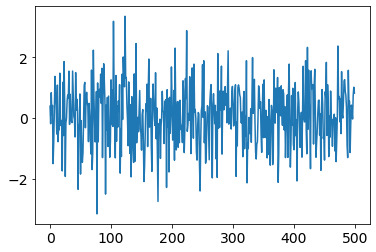

In [ ]:
valormedio = 0.0
desviopadrao = 1
numeropontos = 500
 
df = np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)
 
plt.plot(df)


#**Testando**

##**Função para fazer o teste de estacionaridade**

In [ ]:
def adf(series, p_value=0.05):
  results = adfuller(series)
  print('Test result: ',results[0])
  if results[1] <= p_value:
    print('Stationary')
  else:
    print('Non Stationary')

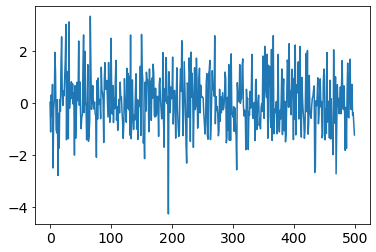

In [ ]:
valormedio = 0.0
desviopadrao = 1
numeropontos = 500
 
df = np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)
 
plt.plot(df)


In [ ]:
adf(df)

Test result:  -22.90252389607437
Stationary


###**O resultado deu como série estacionária graficamente**

#**Tranfromação logaritmica**

In [ ]:
log_df = np.log(20)

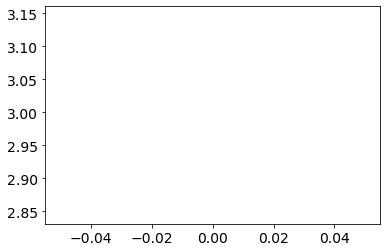

In [ ]:
valormedio = 0.0
desviopadrao = 1
numeropontos = 500
 
df = np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)

plt.plot(log_df)

In [ ]:
adf(df)

Test result:  -15.095947720914493
Stationary


#****

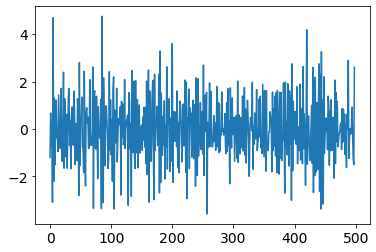

In [ ]:
diff_df = np.diff(df)
plt.plot(diff_df);

In [ ]:
adf(diff_df)

Test result:  -9.02636998479812
Stationary


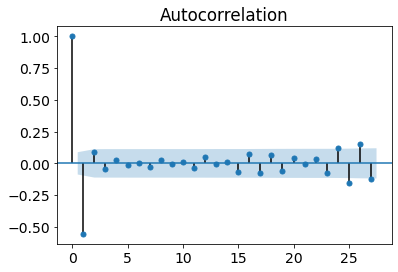

In [ ]:
plot_acf(diff_df);

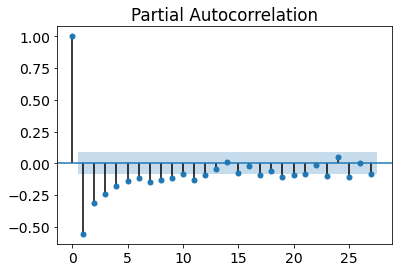

In [ ]:
plot_pacf(diff_df);
#ARIMA (0,1,500)-> Random Walk

###**Resultado analítico deu série estacionária**

2. Repetir a questão 1 do exercício considerando apenas n=50 observações. Como a mudança em n afeta os resultados? (discutir)

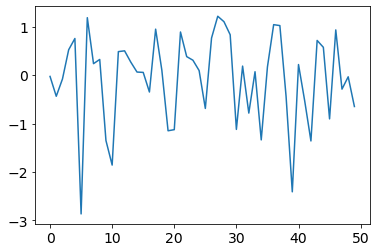

In [ ]:

valormedio = 0.0
desviopadrao = 1
numeropontos = 50
 
df = np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)
 
plt.plot(df)
plt.show()

3. Dada a série abaxo faça a análise exploratória dela e realize as operações a seguir.

a)Produza um gráfico dos dados da sére. Faça um gráfico da série agregada e faça um boxplot que sumarize os dados observados para cada um dos períodos sazonais. Comente a respeitos dos resultados obtidos em cada um dos gráficos. (Dica: busque por dados agregados em dados de séries temporais e boxplot em séries temporais)

In [ ]:
import pandas as pd

df = pd.read_csv('croaciaPop.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0.652691769096606  59 non-null     float64
dtypes: float64(1)
memory usage: 600.0 bytes


In [ ]:
df.head()

,0.652691769096606
0,0.703494
1,0.687765
2,0.641645
3,0.657318
4,0.693190


b) Decomponha a série nos componentes tendência, sazonalidade, e resíduos,
e plote os componentes da série. 

c) Plote o correlograma da série residual da decomposição anterior e comente os resultados

d)Ajuste um modelo Holt-Winters apropriado aos dados da série anterior, mostre os parâmetros e calcule o erro de predição. Considere para os dados de treinamento os anos de 1960-12-31 a 2000-12-31(inclusive) e para teste os dados de 2001-12-31 a 2019-12-31(inclusive).

e)Ajuste um modelo SARIMA apropriado aos dados da série anterior, mostre os parâmetros e calcule o erro de predição. Considere para os dados de treinamento os anos de 1960-12-31 a 2000-12-31(inclusive) e para teste os dados de 2001-12-31 a 2019-12-31(inclusive). Comente se há melhoia significativa em relação ao erro de predição.